# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan adalah Students' Social Network Profile (https://www.kaggle.com/datasets/zabihullah18/students-social-network-profile-clustering)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSIB/Dataset/student_interests.csv')
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [ ]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

,0
gender,1337
age,2496


In [ ]:
df.duplicated().sum()

266

In [ ]:
df['gender'].unique()

array([nan, 'F', 'M'], dtype=object)

In [ ]:
df.describe(include='all')

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,13663,12504,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,2,1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,16. Jun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11057,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.496933,NaN,NaN,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,NaN,NaN,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,NaN,NaN,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,NaN,NaN,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,NaN,NaN,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


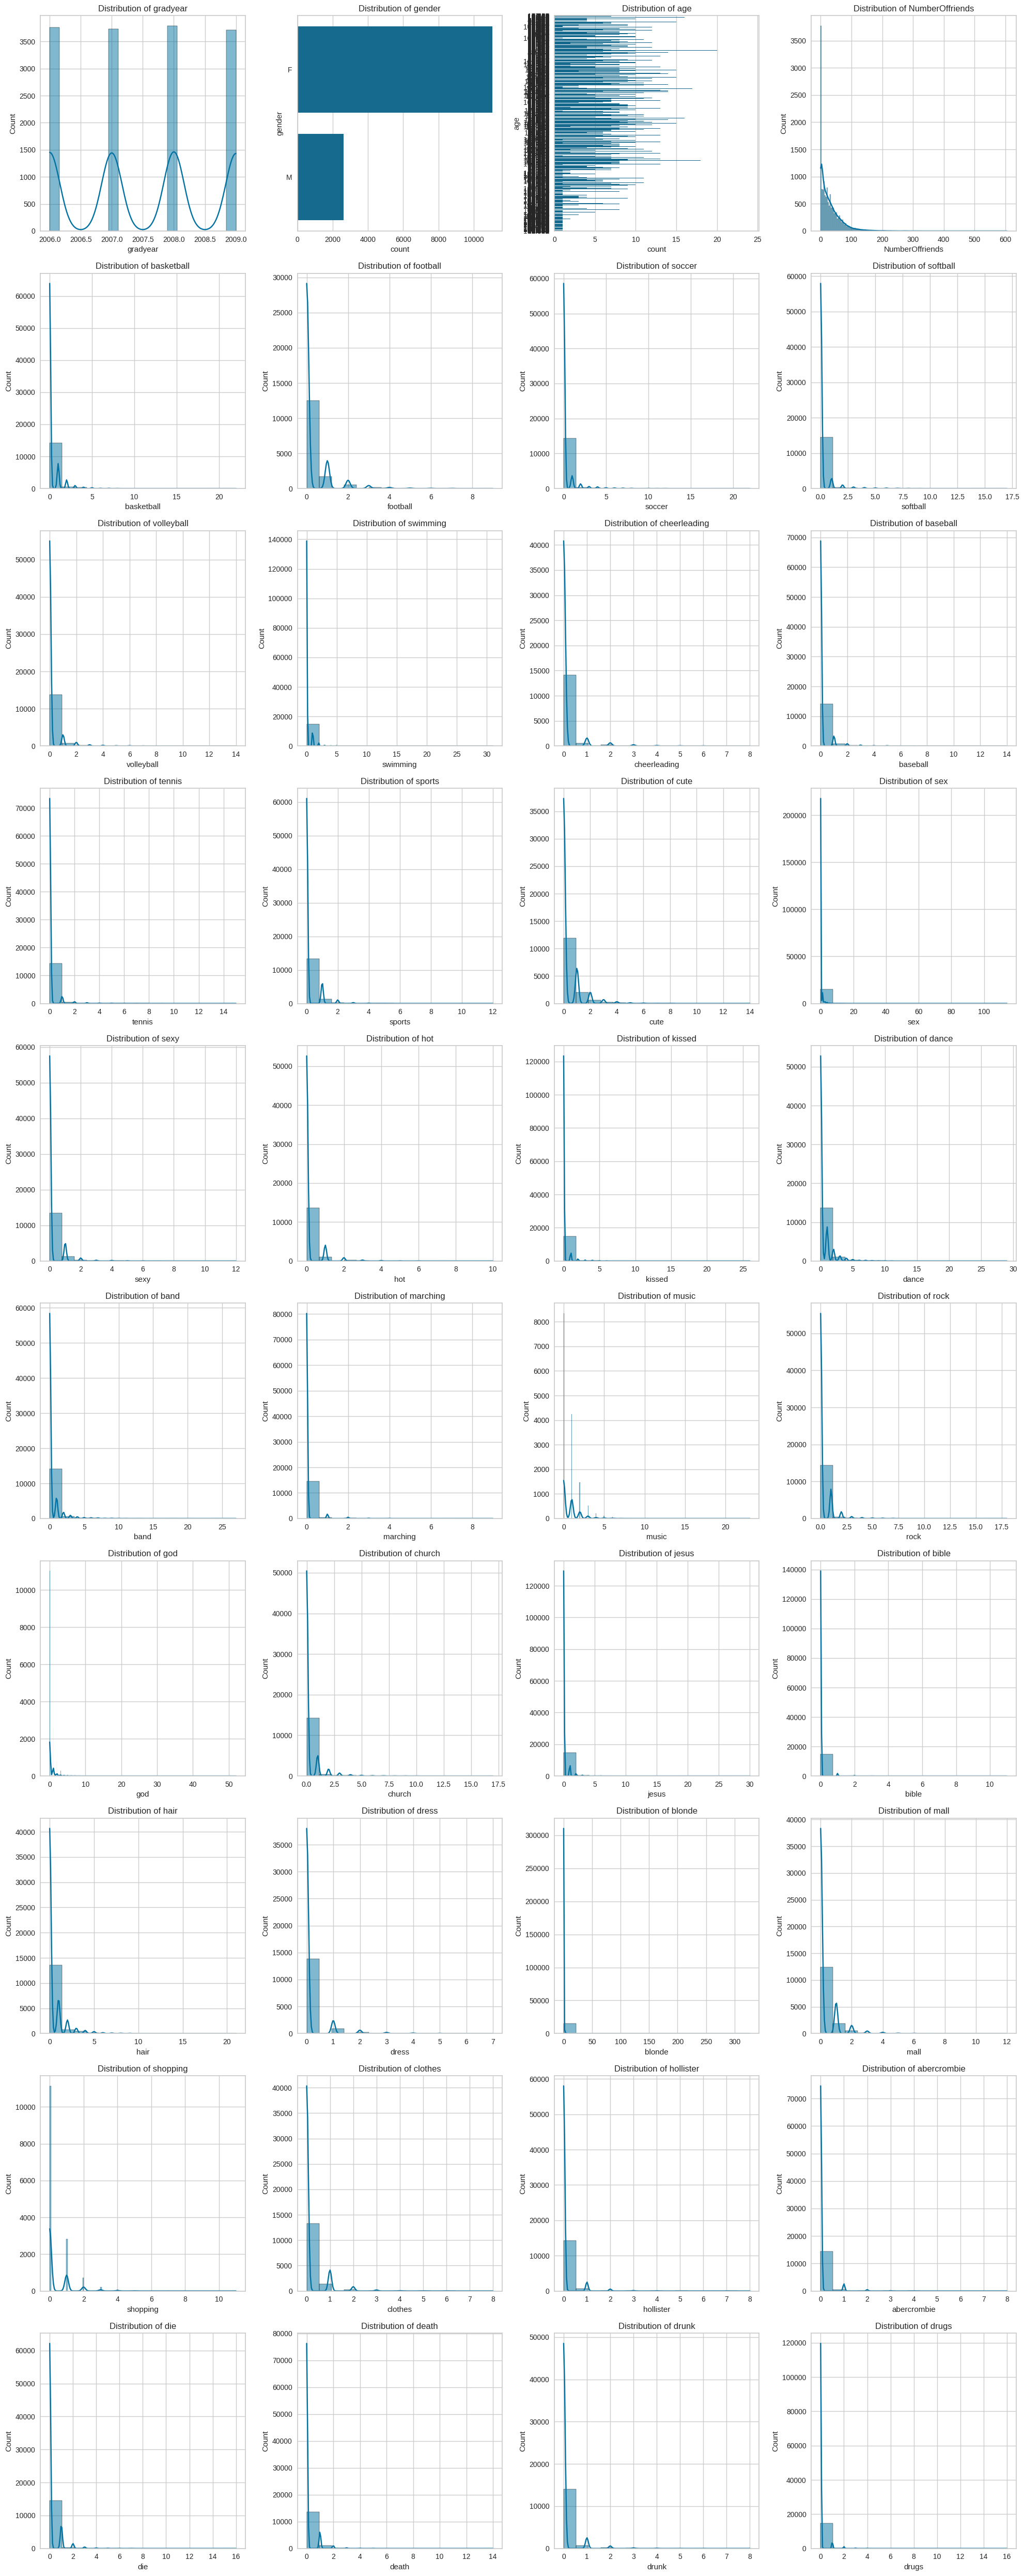

In [ ]:
num_cols = len(df.columns)
num_rows = (num_cols + 3) // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < num_cols :
      if df[col].dtype in ['int64','float64']:
        sns.histplot(df[col], ax=axes[i], kde=True)
      else:
        sns.countplot(df[col], ax=axes[i])

      axes[i].set_title(f'Distribution of {col}')

for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


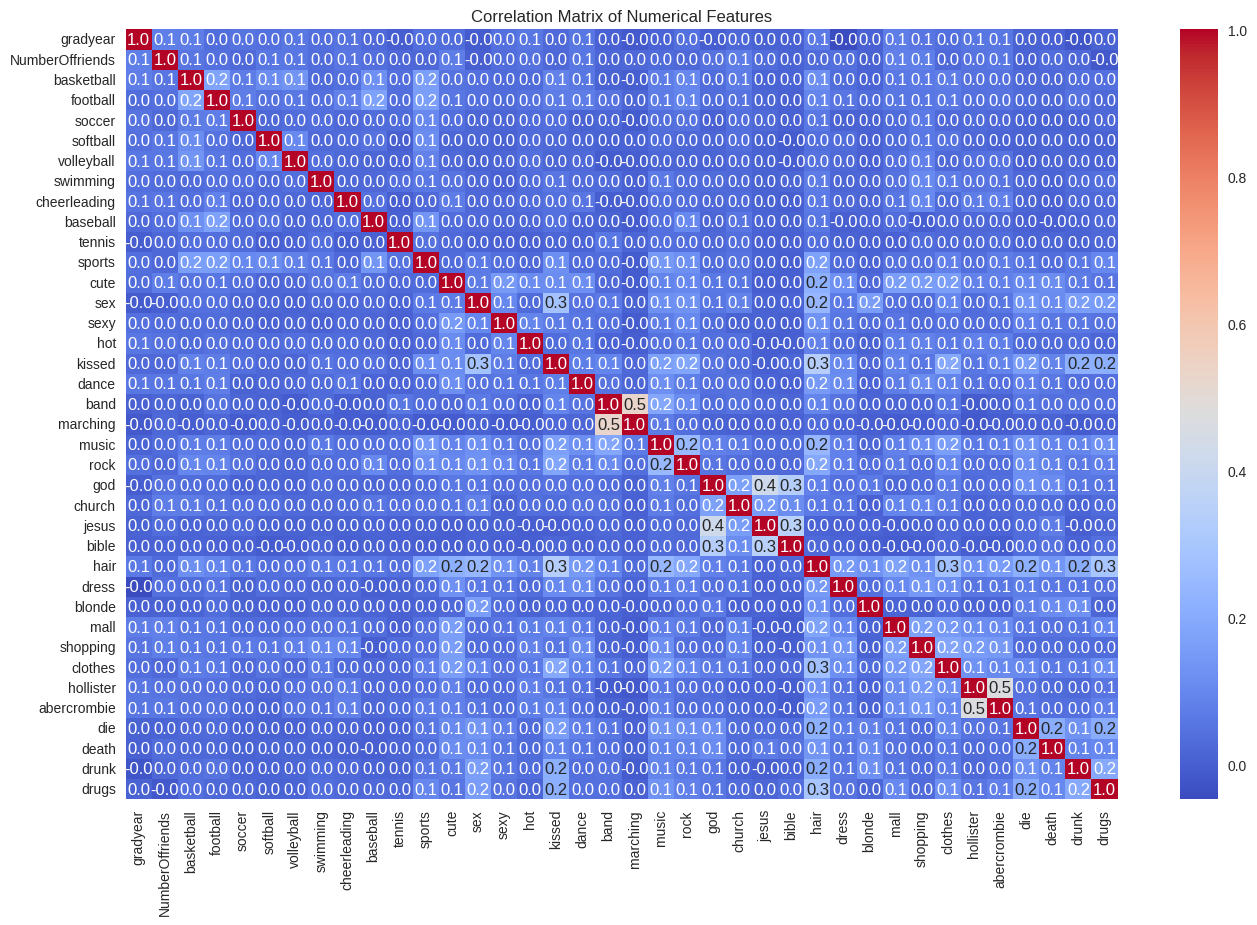

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['gender'].fillna('N', inplace = True)

<ipython-input-13-a73aa70815b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('N', inplace = True)


In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.groupby(by=df['gradyear'])['age'].mean()

,age
gradyear,
2006,19.010786
2007,18.400134
2008,17.593006
2009,16.886244


In [ ]:
df['age'] = df.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,N,18.400134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511000,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,19.010786,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329000,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545000,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999000,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903000,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14720 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gradyear         14720 non-null  int64  
 1   gender           14720 non-null  object 
 2   age              14720 non-null  float64
 3   NumberOffriends  14720 non-null  int64  
 4   basketball       14720 non-null  int64  
 5   football         14720 non-null  int64  
 6   soccer           14720 non-null  int64  
 7   softball         14720 non-null  int64  
 8   volleyball       14720 non-null  int64  
 9   swimming         14720 non-null  int64  
 10  cheerleading     14720 non-null  int64  
 11  baseball         14720 non-null  int64  
 12  tennis           14720 non-null  int64  
 13  sports           14720 non-null  int64  
 14  cute             14720 non-null  int64  
 15  sex              14720 non-null  int64  
 16  sexy             14720 non-null  int64  
 17  hot              

In [ ]:
df.describe()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,...,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000
mean,2007.502989,17.970682,30.381861,0.272011,0.260326,0.226223,0.162704,0.145652,0.137568,0.107133,...,0.115014,0.264402,0.364063,0.153125,0.073166,0.052446,0.189402,0.120245,0.093478,0.062228
std,1.115939,7.040214,35.489676,0.795431,0.708016,0.928619,0.743992,0.644486,0.553566,0.507037,...,2.734216,0.710148,0.733724,0.482794,0.359492,0.283322,0.615158,0.459159,0.424420,0.352314
min,2006.000000,4.309000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,16.520000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,17.443000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,18.400134,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,605.000000,22.000000,9.000000,22.000000,17.000000,14.000000,31.000000,8.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


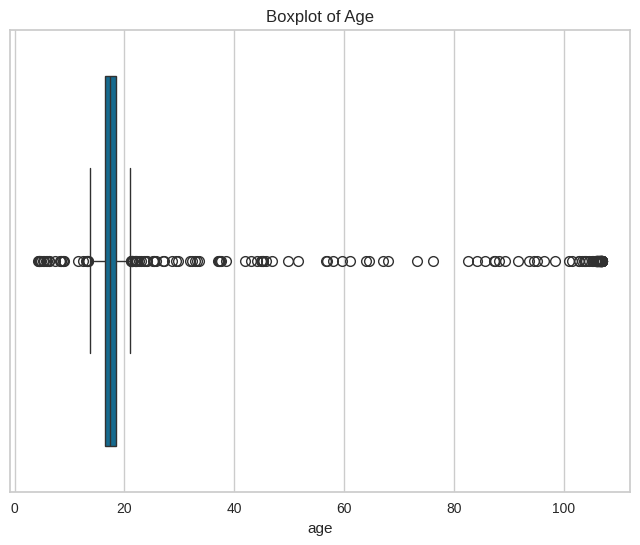

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Boxplot of Age')
plt.show()

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

df = df.drop(outliers.index)

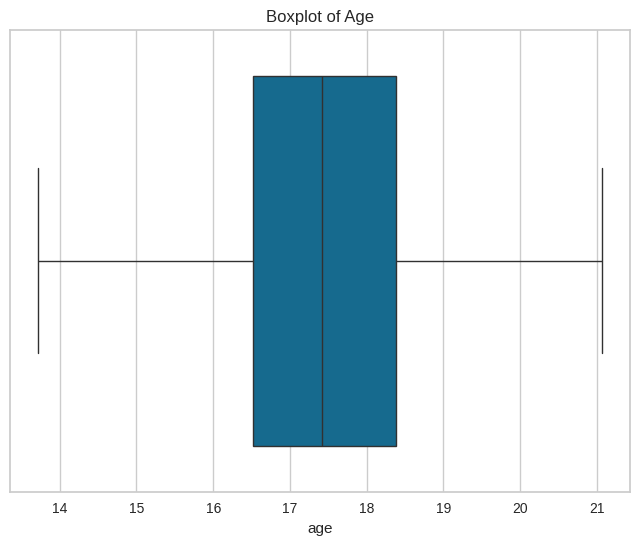

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Boxplot of Age')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['gender'], prefix=['gender'])
df.head()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M,gender_N
0,2007,18.400134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,False,True
1,2007,17.410000,49,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,True,False,False
2,2007,17.511000,41,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,True,False,False
3,2006,19.010786,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
4,2008,16.657000,1,0,0,0,0,0,1,0,...,3,0,0,0,0,0,0,True,False,False


In [ ]:
df.iloc[:,-3:] = df.iloc[:,-3:].astype(int)
df.drop(columns=['gender_N'], inplace=True)
df.head()

<ipython-input-24-844868db4a20>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        1
2        1
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: gender_F, Length: 14545, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:,-3:] = df.iloc[:,-3:].astype(int)
<ipython-input-24-844868db4a20>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        0
2        0
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: gender_M, Length: 14545, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:,-3:] = df.iloc[:,-3:].astype(int)
<ipython-input-24-844868db4a20>:1: FutureWarning: Setting an item of incompatible dtype is depreca

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,2007,18.400134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,17.410000,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,2007,17.511000,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,2006,19.010786,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008,16.657000,1,0,0,0,0,0,1,0,...,0,3,0,0,0,0,0,0,1,0


In [ ]:
df

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,2007,18.400134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,17.410000,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,2007,17.511000,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,2006,19.010786,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008,16.657000,1,0,0,0,0,0,1,0,...,0,3,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,16.329000,21,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,1,0
14996,2008,16.545000,50,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,2007,17.999000,32,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14998,2007,17.903000,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,-0.448736,0.901071,-0.856742,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,-0.248758,-0.211721,...,-0.497047,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,-0.220409,-0.176586,-1.717643,-0.46184
1,-0.448736,0.028606,0.522871,-0.342973,-0.369255,0.831172,-0.219597,-0.22691,1.549544,-0.211721,...,-0.497047,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,2.128197,-0.176586,0.582193,-0.46184
2,-0.448736,0.117603,0.297628,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,-0.248758,-0.211721,...,-0.497047,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,2.128197,2.664614,0.582193,-0.46184
3,-1.344668,1.439152,0.156851,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,-0.248758,-0.211721,...,-0.497047,-0.317154,-0.203392,-0.185396,-0.307826,-0.262037,-0.220409,-0.176586,0.582193,-0.46184
4,0.447196,-0.634906,-0.828586,-0.342973,-0.369255,-0.243536,-0.219597,-0.22691,1.549544,-0.211721,...,-0.497047,5.880349,-0.203392,-0.185396,-0.307826,-0.262037,-0.220409,-0.176586,0.582193,-0.46184


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
kmeans = KMeans(random_state=0)
kmeans.fit(df_scaled)

labels = kmeans.labels_

silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.04578028052031193


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

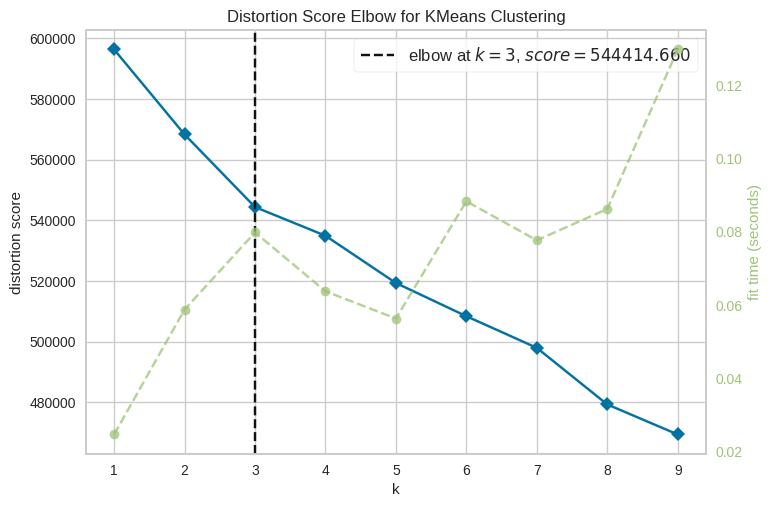

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_scaled)

visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.10756389642842


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
X = df_scaled
y = labels

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)

selected_features = df_scaled.columns[selected_feature_indices]

print("Selected Features:", selected_features)

Selected Features: Index(['hair', 'shopping', 'clothes', 'gender_F', 'gender_M'], dtype='object')


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled[selected_features])
labels_new = kmeans.labels_

silhouette_avg_new = silhouette_score(df_scaled[selected_features], labels_new)
print(f"Silhouette Score after Feature Selection: {silhouette_avg_new}")

Silhouette Score after Feature Selection: 0.5895176129761718


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

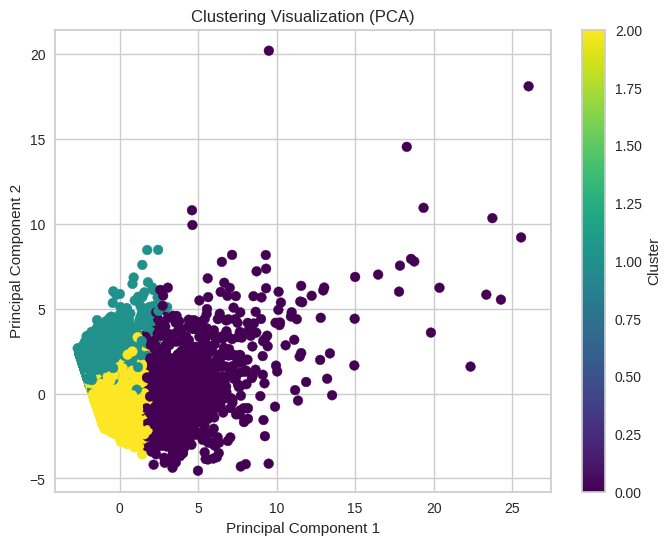

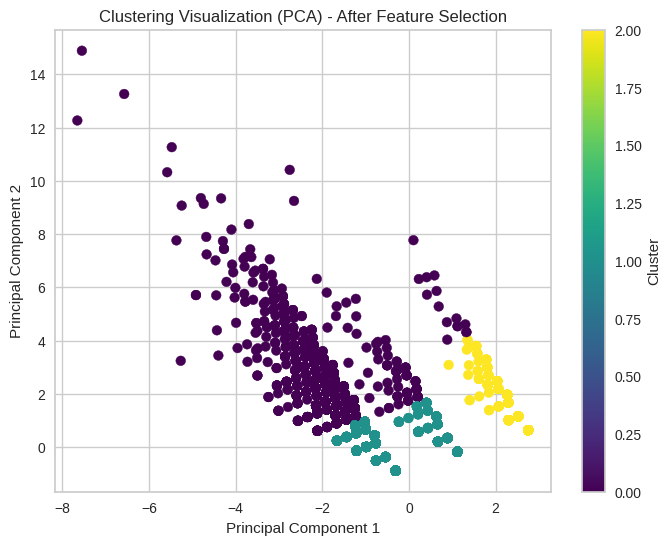

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

if 'selected_features' in locals():
  pca_selected = PCA(n_components=2)
  df_pca_selected = pca_selected.fit_transform(df_scaled[selected_features])
  plt.figure(figsize=(8, 6))
  plt.scatter(df_pca_selected[:, 0], df_pca_selected[:, 1], c=labels_new, cmap='viridis')
  plt.title('Clustering Visualization (PCA) - After Feature Selection')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.colorbar(label='Cluster')
  plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
cluster_characteristics = []
for i in range(3):
    cluster_data = df_scaled[labels_new == i]
    characteristics = {}
    for feature in selected_features:
      characteristics[feature] = {
          'mean': cluster_data[feature].mean(),
          'std': cluster_data[feature].std()
      }
    cluster_characteristics.append(characteristics)

for i, char in enumerate(cluster_characteristics):
  print(f"Cluster {i+1}:")
  for feature, stats in char.items():
    print(f"  {feature}: Mean={stats['mean']:.2f}, Std={stats['std']:.2f}")

Cluster 1:
  hair: Mean=1.85, Std=2.14
  shopping: Mean=1.31, Std=1.88
  clothes: Mean=1.90, Std=2.13
  gender_F: Mean=0.42, Std=0.59
  gender_M: Mean=-0.43, Std=0.28
Cluster 2:
  hair: Mean=-0.16, Std=0.53
  shopping: Mean=-0.06, Std=0.80
  clothes: Mean=-0.19, Std=0.50
  gender_F: Mean=0.36, Std=0.68
  gender_M: Mean=-0.46, Std=0.00
Cluster 3:
  hair: Mean=-0.27, Std=0.49
  shopping: Mean=-0.44, Std=0.31
  clothes: Mean=-0.19, Std=0.54
  gender_F: Mean=-1.72, Std=0.00
  gender_M: Mean=2.17, Std=0.00


Tulis hasil interpretasinya di sini.
1. Cluster 1:
  *   Hair: Rata-rata tinggi (1.85) dan standar deviasi besar (2.14), menunjukkan bahwa kategori ini memiliki variasi yang cukup besar dalam atribut rambut (mungkin mencakup berbagai jenis atau panjang rambut).
  *   Shopping: Rata-rata (1.31) menunjukkan kecenderungan lebih positif terhadap kebiasaan belanja, dengan variasi yang relatif besar (standar deviasi 1.88).
  *   Clothes: Rata-rata tinggi (1.90) dengan variasi besar, menunjukkan kecenderungan klaster ini lebih memperhatikan atau tertarik pada pakaian.
  *   Gender_F: Rata-rata positif (0.42) menunjukkan adanya sedikit dominasi perempuan, dengan variasi yang lebih besar (standar deviasi 0.59).
  *   Gender_M: Nilai rata-rata negatif (-0.43), dengan sedikit variasi, menandakan dominasi gender perempuan yang lebih kuat daripada laki-laki dalam klaster ini.

  Klaster ini cenderung memiliki individu yang lebih tertarik pada belanja dan pakaian, dengan kecenderungan lebih banyak perempuan (meskipun tidak dominan sepenuhnya).
2. Cluster 2:
  *   Hair: Nilai rata-rata dekat dengan 0 (-0.16), yang menunjukkan individu dalam klaster ini memiliki variasi yang lebih rendah terkait atribut rambut.
  *   Shopping: Nilai rata-rata hampir 0 (-0.06), menandakan bahwa minat terhadap shopping lebih rendah dibandingkan dengan cluster lainnya.
  *   Clothes: Nilai rata-rata juga rendah (-0.19), menunjukkan ketertarikan yang tidak terlalu tinggi terhadap pakaian.
  *   Gender_F: Nilai positif (0.36) menunjukkan sedikit dominasi perempuan, dengan variasi cukup besar (standar deviasi 0.68).
  *   Gender_M: Nilai negatif (-0.46) menunjukkan dominasi gender perempuan dalam klaster ini.

  Klaster ini cenderung memiliki individu dengan minat rendah terhadap shopping dan pakaian. Perempuan lebih dominan di sini, tetapi tidak ada ketertarikan yang menonjol pada atribut lainnya.
3. Cluster 3:
  *   Hair: Nilai rata-rata negatif (-0.27), menunjukkan ketertarikan yang relatif rendah terhadap atribut rambut di klaster ini.
  *   Shopping: Nilai rata-rata negatif (-0.44), menunjukkan bahwa individu dalam klaster ini cenderung kurang tertarik pada belanja.
  *   Clothes: Nilai rata-rata negatif (-0.19), menandakan bahwa ketertarikan terhadap pakaian juga rendah di klaster ini.
  *   Gender_F: Nilai sangat negatif (-1.72) dan tanpa variasi (standar deviasi 0), menunjukkan bahwa klaster ini hampir sepenuhnya terdiri dari individu laki-laki.
  *   Gender_M: Nilai sangat positif (2.17) dan tanpa variasi (standar deviasi 0), menunjukkan bahwa klaster ini sepenuhnya terdiri dari individu laki-laki.

  Klaster ini sangat didominasi oleh laki-laki, dengan sedikit ketertarikan terhadap shopping dan pakaian. Ini menunjukkan karakteristik kelompok yang lebih heterogen dalam atribut lain, tetapi konsisten dalam jenis kelamin.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_scaled['cluster'] = labels_new
df_scaled.to_csv('clustering_results.csv', index=False)